# Imports

In [1]:
import sys
sys.path.insert(1, '../')
from genesis import *

C:\Users\vin_s\AppData\Local\Programs\Python\Python39\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
universe = G10_FX
total_returns = total_returns_usd[universe]
spot_returns = spot_returns_usd[universe]
carry_returns = carry_returns_usd[universe]

# Settings

In [3]:
settings = Settings(start_date = "2000-01-01", end_date = "2021-12-31", notional = 100, implementation_lag = 1,
             asset_scaling_method="simple", asset_scaling_target=0.1, asset_scaling_width=126, rebalance_period="daily",
             sector_scaling_method="simple", sector_scaling_target=0.1, sector_scaling_width=126,
             portfolio_scaling_method="simple", portfolio_scaling_target=0.1, portfolio_scaling_width=252)

# Other Data

# Data integrity

# Signal

In [4]:
sig = spot_price_usd[universe].pipe(fill_date).rolling(window = 252*6, min_periods = 252*3).apply(lambda x: (x[-1]/x[0])-1).pipe(demean_xs).pipe(top_bottom_xs).pipe(cap_helper, 0.2).pipe(rolling_mean, 5) * -1

# Backtest Daily Rebal

In [5]:
daily_bt = Backtest(signal = sig, asset_returns = total_returns, tcost = abs(total_returns*0), settings = settings)
daily_bt.run()

Re-arranging asset columns
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]


In [6]:
get_summary(daily_bt)

Returns   : 0.04297808001096181
Vol       : 0.10656024198792555
SR        : 0.4033219070188645
Max DD    : -38.7

C Returns : 0.03800838767302125
C SR      : 0.3458575924307956
C Max DD  : -33.25

Hit rate  : 0.501
W | N | L : 0.5 | 0.0 | 0.5
W/L Ratio : 1.01


In [7]:
get_returns_stats(daily_bt.asset_rtn, daily_bt.wts)

,USDAUD,USDCAD,USDEUR,USDGBP,USDJPY,USDNZD,USDSEK,USDNOK,USDCHF
annualized_return,1.200023,0.836402,0.278045,0.846541,-0.131165,0.783733,0.011113,-0.340819,0.849807
sharpe,0.405768,0.36234,0.096541,0.172877,-0.018364,0.177441,0.00565,-0.08066,0.160756
dollar_sharpe,0.392182,0.351359,0.081622,0.162955,-0.054007,0.163782,-0.004662,-0.099179,0.134298
trade_sharpe,0.541093,0.786237,0.157136,0.211874,-0.017241,0.246688,0.052062,-0.125834,0.187339
long_sharpe,0.630002,0.599306,0.555329,1.758235,0.722443,0.154221,0.281014,0.333727,0.17626
short_sharpe,0.445846,1.065738,-0.287983,0.088462,-0.322701,1.768844,0.05193,-0.15535,1.692172
sortino,0.207595,0.116114,0.039948,0.088083,-0.011779,0.099332,0.001919,-0.037293,0.089141
max_drawdown,-10.784224,-7.13143,-15.072511,-21.775081,-39.196444,-14.337689,-7.474973,-21.966924,-18.364488
max_drawdown_start,2010-07-19,2010-05-20,2013-02-01,2008-07-15,2004-12-03,2006-06-28,2019-03-20,2018-02-01,2010-02-15
max_drawdown_end,2012-08-10,2016-01-19,2018-02-01,2010-05-18,2007-06-22,2007-07-24,2019-10-09,2020-03-20,2011-08-09


In [8]:
daily_bt.model_rtn.skew()

0.24177436154380125

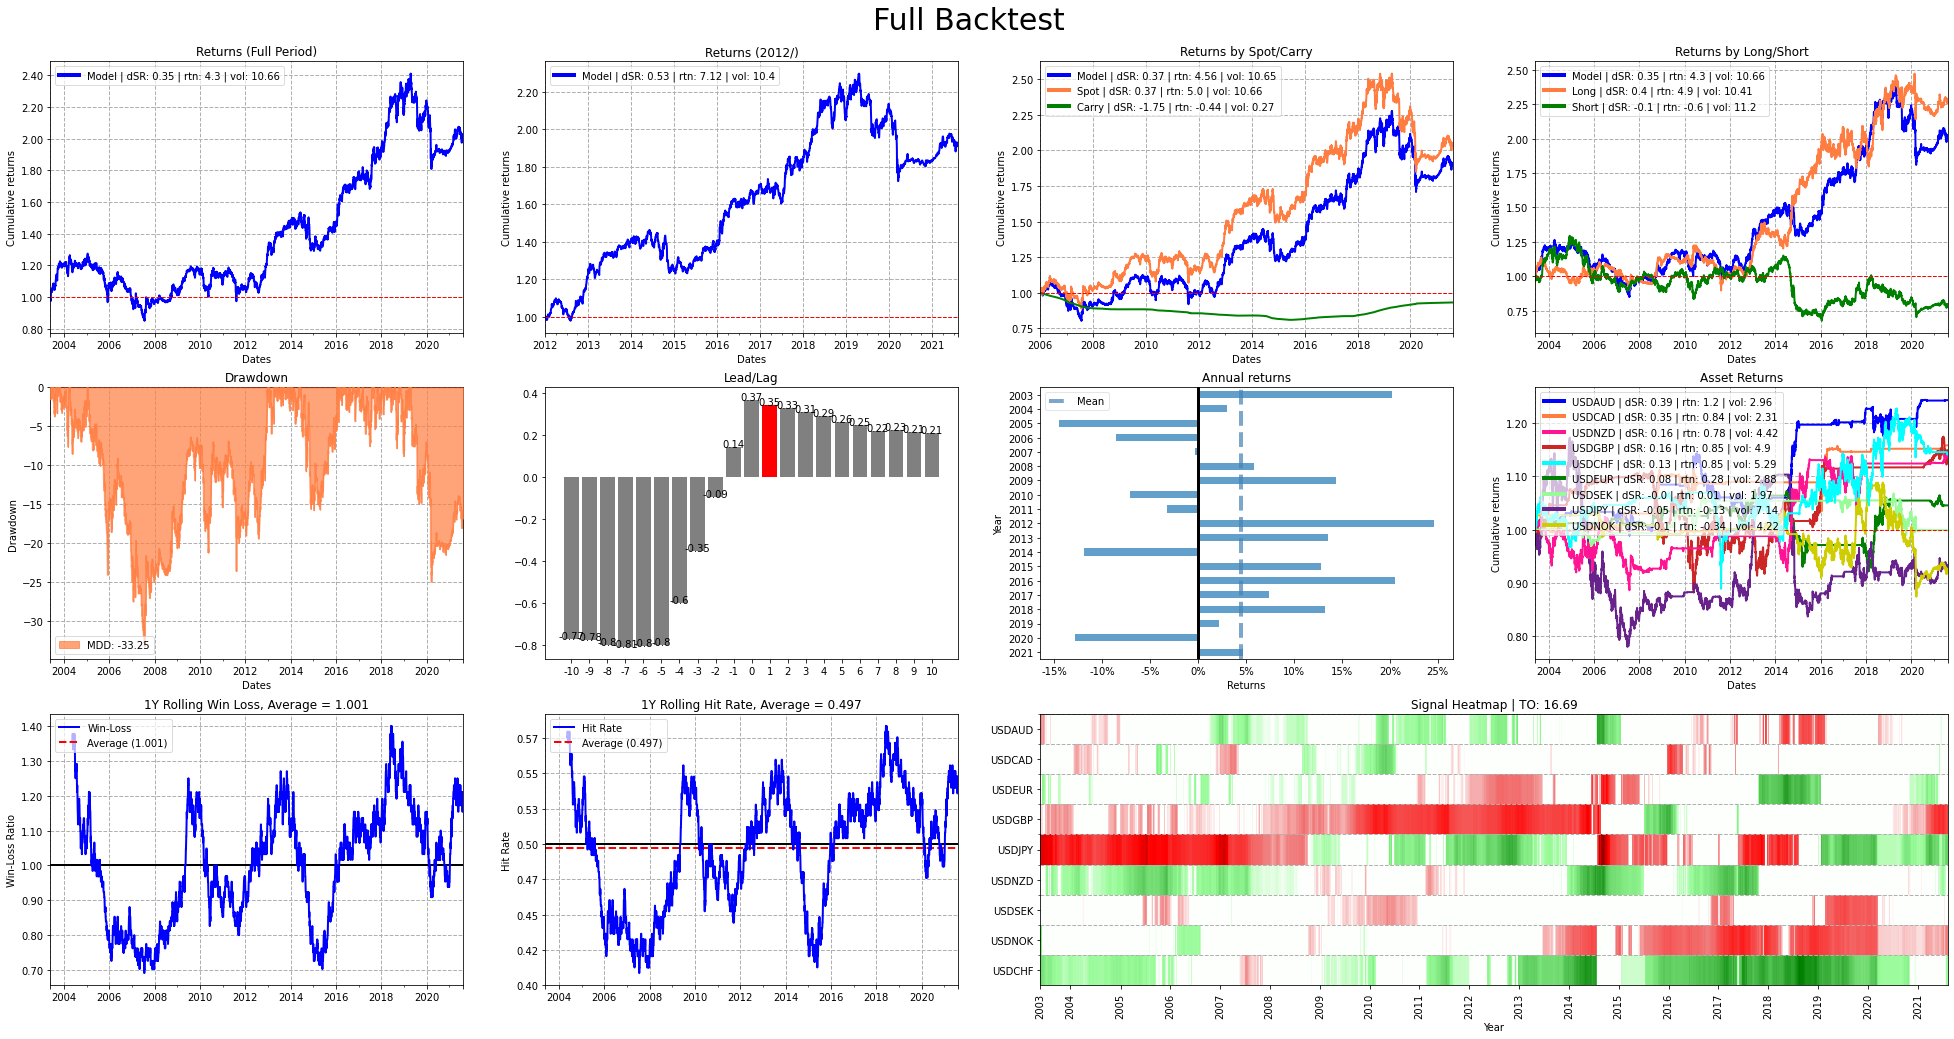

In [9]:
plot_bt(daily_bt)

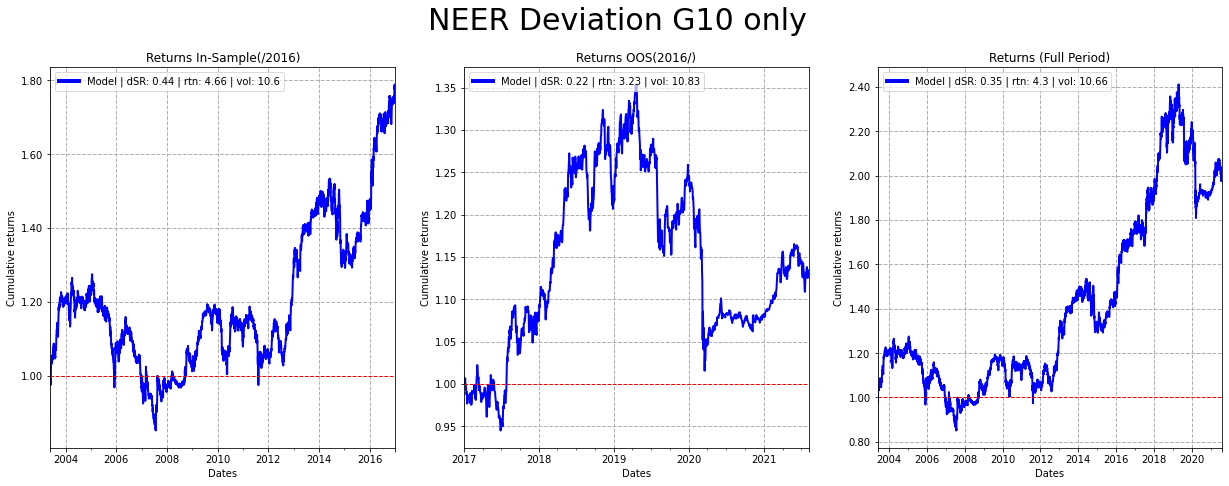

In [10]:
gs = GridSpec(nrows = 1, ncols = 3)
fig = plt.figure(figsize=(21, 7))
fig.suptitle(t="NEER Deviation G10 only", fontsize=30, y=1)

fig.add_subplot(gs[0]).set_label(gen_plot_rtn(daily_bt.model_rtn[:"2016"], main = "Returns In-Sample(/2016)", compound=True))
fig.add_subplot(gs[1]).set_label(gen_plot_rtn(daily_bt.model_rtn["2017":], main = "Returns OOS(2016/)", compound=True))
fig.add_subplot(gs[2]).set_label(gen_plot_rtn(daily_bt.model_rtn, main = "Returns (Full Period)", compound=True))